In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, FloatSlider

%matplotlib inline

pi = np.math.pi

def setLabels(lX, lY):
    plt.xlabel(lX)
    plt.ylabel(lY)
    

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

/var/folders/zj/lbz_1j0n73l6hwl3txpyt9dr0000gn/T/ipykernel_50709/3436220622.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pi = np.math.pi


In [2]:
def generate_impulse_sequence(x_n, F_cont):
    return np.ravel(np.hstack((np.zeros( (x_n.size, int(F_cont - 1)) ), x_n[:,None] )))*F_cont

# Aufgabe 5: Faltungsalgebra, Zeitvariante Systeme

Im folgenden werden drei sehr ähnliche, zeitvariante Systeme miteinander vergleichen. Abgebildet ist jeweils das gestrichelte Eingangssignal und das Ausgangssignal einer linearen Torschaltung, einer Abtast-Halte-Schaltung und eines linearen Interpolators. Die Breite der Intervalle, in denen das Ausgangssignal ungleich Null ist, ist für die ersten beiden Schaltungen mit $t_0$ angegeben.

## Vorbemerkungen zur Rechnung mit dem Dirac-Kamm

### Definition (etwas pragmatisch)

\begin{align}
    \delta(t-t_0) = \begin{cases}
        0\ :& t\neq t_0, \\
        \infty\ :& t = t_0,
    \end{cases}\\[1em]
    \text{sodass} \qquad \int_{\mathcal{T}: t_0 \in \mathcal{T}} \delta(t-t_0) \mathrm{d}t = 1
\end{align}

### Ausblendeeigenschaft

\begin{align}
    x(t) \cdot \delta(t-t_0) = x(t_0)\delta(t-t_0)
\end{align}  

Diese Eigenschaft folgt aus der Definition des Diracimpulses: Da der Impuls abgesehen von der Stelle $t_0$ überall Null ist, ist auch nur dieser eine Wert von $x$ relevant. Weil die Multiplikation distributiv ist, gilt die Ausblendeeigenschaft auch für einen Dirackamm:

\begin{align}
    x(t) \cdot \sum_{n=-\infty}^{\infty} \delta(t-nT) = \sum_{n=-\infty}^{\infty} x(t)\delta(t-nT) = \sum_{n=-\infty}^{\infty} x(nT)\delta(t-nT)
\end{align}  

### Verschiebeeigenschaft:

\begin{align}
    x(t) \ast \delta(t-T) &= \int_{-\infty}^{\infty} x(\tau) \delta(t-t_0-\tau)\mathrm{d}\tau 
        = \int_{-\infty}^{\infty} \underbrace{x(t-t_0)}_{\text{unabh. von }\tau} \delta(t-t_0-\tau)\mathrm{d}\tau \\
        &= x(t-t_0) \underbrace{\int_{-\infty}^{\infty} \delta(t-t_0-\tau)\mathrm{d}\tau}_{=1 \text{ nach Def.}} = x(t-t_0)
\end{align}  

Die Faltung eines Signals mit einem verschobenen Diracimpuls ergibt also immer der verschobene Signal. Durch die Linearität der Faltung lässt sich auch die Verschiebeeigenschaft auf einen Dirackamm übertragen:

\begin{align}
    x(t) \ast \sum_{n=-\infty}^{\infty} \delta(t-nT) = \sum_{n=-\infty}^{\infty} x(t) \ast \delta(t-nT) = \sum_{n=-\infty}^{\infty} x(t-nT)
\end{align}


### Transformationseigenschaften:
Die Fouriertransformation eines verschobenen Diracimpulses ist ein Phasentherm. Dies lässt sich über die Ausblendeeigenschaft einfach zeigen:

\begin{align}
    \mathcal{F}\left\{ \delta(t-t_0) \right\} = \int_{-\infty}^{\infty} \delta(t-t_0) \mathrm{e}^{-j\omega t} \mathrm{d}t = \int_{-\infty}^{\infty} \delta(t-t_0) \underbrace{\mathrm{e}^{-j\omega t_0}}_{\text{unabh. von $t$!}} \mathrm{d}t = \mathrm{e}^{-j\omega t_0}  \underbrace{\int_{-\infty}^{\infty} \delta(t-t_0) \mathrm{d}t}_{=1 \text{ nach Def.}} = \mathrm{e}^{-j\omega t_0}
\end{align}

Dies ist auch konsistent mit dem Verschiebungssatz und dem Faltungssatz:

\begin{align}
    \mathcal{F}\left\{ x(t-t_0) \right\} = \mathcal{F}\left\{ x(t) \ast \delta(t-t_0) \right\} = 
    \mathcal{F}\left\{ x(t)\right\} \cdot \mathcal{F}\left\{ \delta(t-t_0) \right\} = 
    X(j\omega) \mathrm{e}^{-j\omega t_0}
\end{align}  
  
Für den Dirac-Kamm gilt das Transformationspaar aus der Vorlesung:

\begin{align}
    \mathcal{F}\left\{ \sum_{n=-\infty}^{\infty} \delta(t-nT) \right\} \overset{!}{=} \frac{2 \pi}{T} \sum_{n=-\infty}^{\infty} \delta\left(\omega -n\frac{2 \pi}{T}\right)
\end{align}

Für Zweifler steht die Herleitung am Ende des Notebooks.

#### Poisson'sche Summenformel
Mit diesem Transformationspaar ist die Poisson'sche Summenformel sehr einfach zu zeigen. Einerseits muss gelten:

\begin{align}
    \mathcal{F}\left\{ \sum_{n=-\infty}^{\infty} x(nT) \delta(t-nT) \right\}
    = \sum_{n=-\infty}^{\infty} x(nT) \mathcal{F}\left\{ \delta(t-nT) \right\}
    = \sum_{n=-\infty}^{\infty} x(nT) \mathrm{e}^{-j\omega nT} = X\left(\mathrm{e}^{j\omega T}\right) 
\end{align}

Andererseits gilt aber auch wegen der Ausblendeigenschaft und dem Multiplikationssatz:  
  
\begin{align}
    \mathcal{F}\left\{ \sum_{n=-\infty}^{\infty} x(nT) \delta(t-nT) \right\}
    &= \mathcal{F}\left\{ x(t) \cdot \sum_{n=-\infty}^{\infty} \delta(t-nT) \right\}
    = \frac{1}{2 \pi} \mathcal{F}\left\{ x(t) \right\} \ast \mathcal{F}\left\{ \sum_{n=-\infty}^{\infty} \delta(t-nT)  \right\} \\
    &= \frac{1}{2 \pi} X(j\omega) \ast \frac{2 \pi}{T} \sum_{n=-\infty}^{\infty} \delta\left(\omega -n\frac{2 \pi}{T}\right)
    = \frac{1}{T} \sum_{n=-\infty}^{\infty} X\left(j\left(\omega -n\frac{2 \pi}{T}\right)\right)
\end{align}

Und damit ist insgesamt gezeigt:

\begin{align}
    X\left(\mathrm{e}^{j\omega T}\right) = \sum_{n=-\infty}^{\infty} x(nT) \mathrm{e}^{-j\omega nT}   
     = \frac{1}{T} \sum_{n=-\infty}^{\infty} X\left(j\left(\omega -n\frac{2 \pi}{T}\right)\right)
\end{align}

## Weitere Transformationspaare:
Benötigt werden ferner:

\begin{align}
    \mathcal{F}\left\{\mathrm{rect}\left( t \right) \right\} = \mathrm{si}\left( \frac{\omega}{2} \right)
    \underset{\text{Ähnlichkeitssatz}}{\Rightarrow} 
    \mathcal{F}\left\{\mathrm{rect}\left( \frac{t}{t_0} \right) \right\} = t_0 \mathrm{si}\left( \frac{\omega t_0}{2} \right)
\end{align}

sowie mit der Faltung

\begin{align}
    \Lambda\left(\frac{t}{T}\right) = \frac{1}{T} \mathrm{rect}\left(\frac{t}{T}\right) \ast \mathrm{rect}\left(\frac{t}{T}\right)
    \underset{\text{Faltungssatz}}{\Rightarrow}
    \mathcal{F}\left\{\Lambda\left( \frac{t}{T} \right) \right\} = \frac{1}{T} \left(\mathcal{F}\left\{ \mathrm{rect}\left( \frac{t}{T} \right)\right\} \right)^2 = T \mathrm{si}^2\left( \frac{\omega T}{2} \right)
\end{align}


# Diagramme im Zeitbereich

interactive(children=(FloatSlider(value=0.6, description='t_0', max=1.0), Output()), _dom_classes=('widget-int…

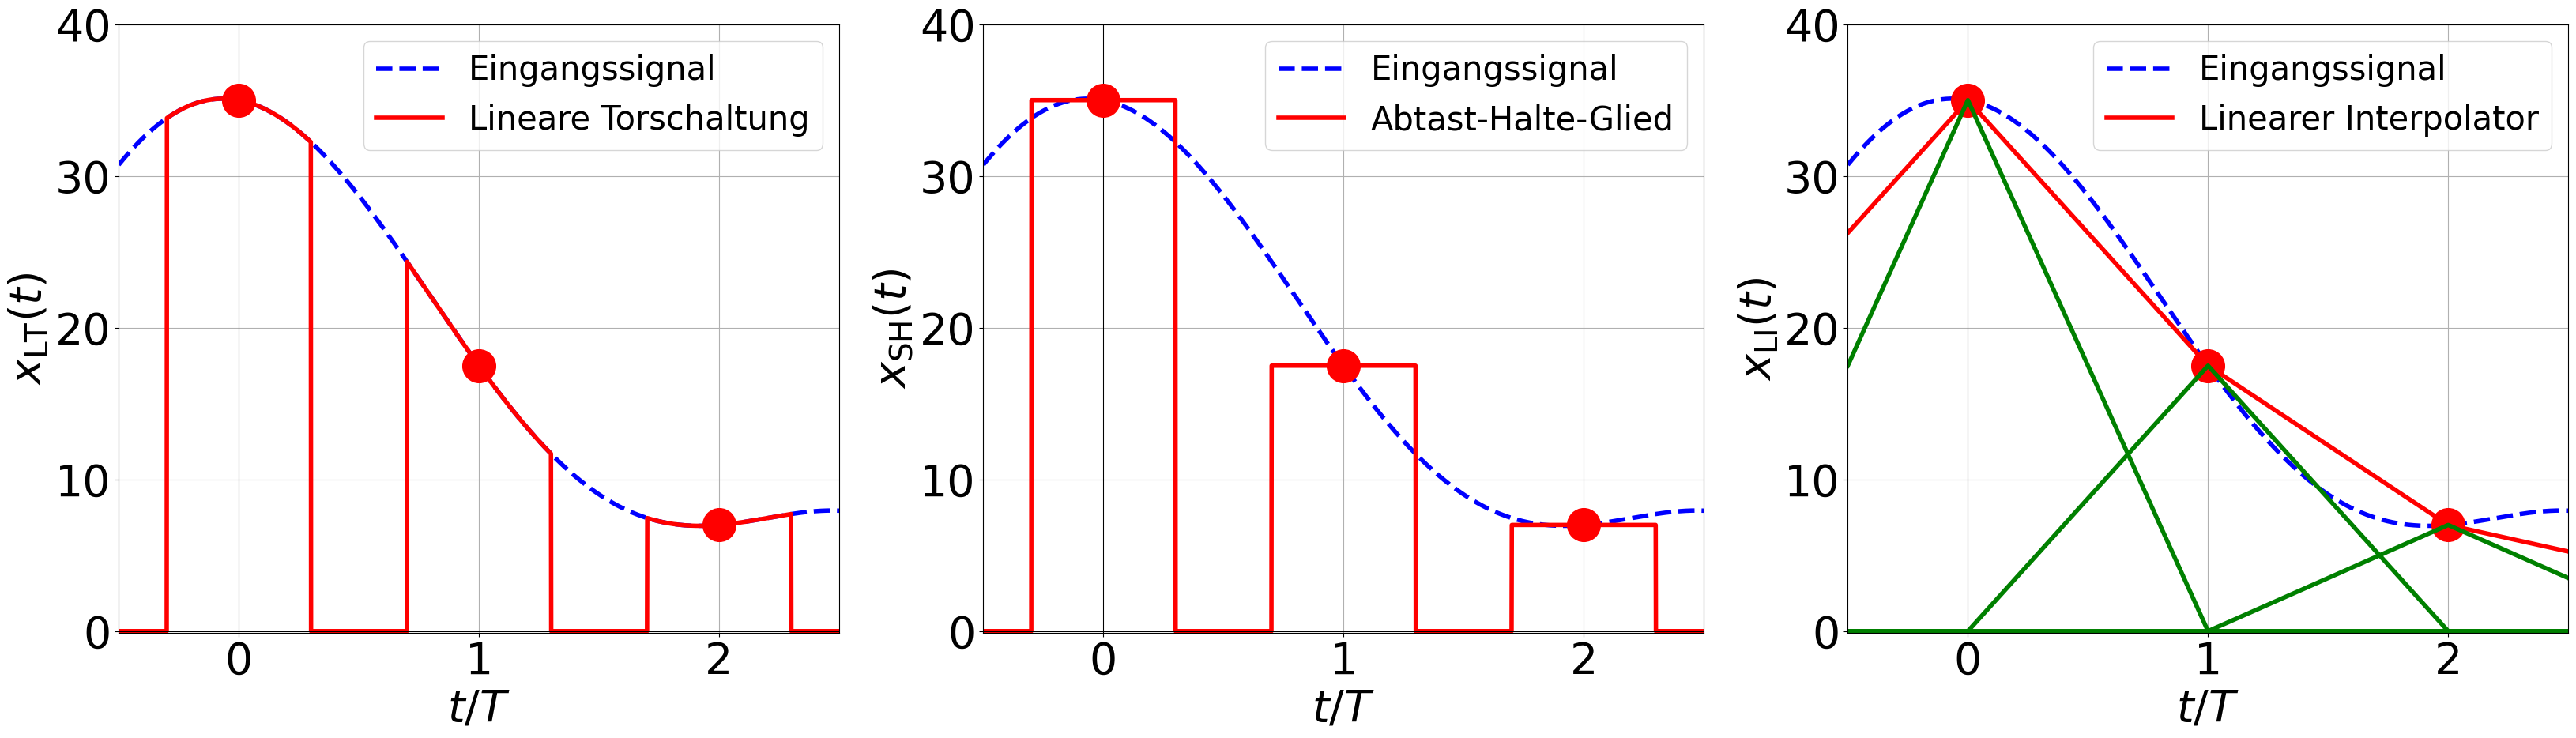

In [3]:
F_cont = 1000
delta_t = 1/F_cont
T = 1
N_min = -3
N_max = 4
x_max = 35

# (Beispielhaftes) diskretes Signal im Zeitbereich
n = np.arange(N_min, N_max + 1)
x_n = x_max/(n**2 + 1)

# Zugehoeriges kontinuierliches Signal im Zeitbereich
t = np.arange(N_min, N_max + 1, 1/F_cont)*T
p_interpol = np.polyfit(n, x_n, x_n.size - 1)
x_t = np.polyval(p_interpol, t)

# 
x_samp = generate_impulse_sequence(x_n, F_cont)


# Hilfsfunktion, um eine einzelnen Plot zu erstellen
def plot_signal(axObj, signal, ylabel='', legendEntry=''):
    axObj.axvline(lw=0.75, c='k')
    axObj.plot(t, x_t, 'b--', lw=4, label='Eingangssignal')
    axObj.plot(n, x_n, 'ro', ms=30)
    axObj.plot(t, signal, 'r', lw=4, label=legendEntry)
    axObj.axhline(lw=0.75, c='k')
    axObj.set_xlim((-0.5, 2.5))
    axObj.set_ylim((-0.1, 40))
    axObj.set_xticks(np.arange(0, 3))
    axObj.set_yticks(np.arange(0, 50, 10))
    axObj.set_xlabel(r'$t/T$')
    axObj.set_ylabel(ylabel)
    axObj.grid(True)
    axObj.legend(loc='upper right', fontsize=30)

@interact(t_0=FloatSlider(min=0, max=1.0, step=0.1, value=0.6))
def plot_time_domain(t_0):
    fig1 = plt.figure()
    
    # linear gate circuit
    gate = np.cos(2*pi*t/T) >= np.cos(pi*t_0)
    x_lt = x_t*gate
    ax1 = fig1.add_subplot(1, 3, 1)
    plot_signal(ax1, x_lt, r'$x_{\rm{LT}}(t)$', 'Lineare Torschaltung')

    # sample and hold circuit
    rect = (np.abs(t) < t_0*T/2)*1.0
    x_sh = np.convolve(x_samp, rect, 'same')*delta_t
    ax2 = fig1.add_subplot(1, 3, 2)
    plot_signal(ax2, x_sh, r'$x_{\rm{SH}}(t)$', 'Abtast-Halte-Glied')

    # linear interpolation circuit
    triangle = np.maximum((1 - abs(t/T)), 0)*1.0
    x_li = np.convolve(x_samp, triangle, 'same')*delta_t
    ax3 = fig1.add_subplot(1, 3, 3)
    plot_signal(ax3, x_li, r'$x_{\rm{LI}}(t)$', 'Linearer Interpolator')
    ax3.plot(t, x_n[3]*triangle, 'g', lw=4)
    ax3.plot(t, x_n[4]*np.roll(triangle, F_cont), 'g', lw=4)
    ax3.plot(t, x_n[5]*np.roll(triangle, 2*F_cont), 'g', lw=4)

## 5.1
Beschreiben sie den Abtast- bzw. Rekonstruktionsvorgang im Zeit- und Frequenzbereich

## 5.2
Diskutieren sie mit Hilfe einer Skizze des Spektrums des abgetasteten Signals, ob das ursprüngliche Signal fehlerfrei zurückgewonnen werden kann.

In [4]:
omega = np.linspace(-8*pi/T, 8*pi/T, 16001)
# omega_n = n_w*pi/T
n_w = np.arange(-8, 9, 2)
# Als Beispiel-Eingangspektrum wird ein Rechteck gewählt
X_w = abs(omega*2*T/pi) < 1

Die Teilaufgaben werden gemeinsam für jedes der Systeme gelöst.
Ziel für die Zeitbereichsdarstellung jedes Systems ist es, den Dirac-Kamm freizustellen. Danach können dann die Transformationspaare benutzt werden, um den Ausdruck in den Spektralbereich zu transformieren. Anschließend kann das Ergebnis vereinfacht werden.

### a) Lineare Torschaltung:
#### Zeitsignal:

\begin{align}
x_\text{LT}(t) &= x(t) \sum_{n=-\infty}^{\infty} \mathrm{rect}\left(\frac{t-nT}{t_0}\right)
    = x(t) \left[ \left(\sum_{n=-\infty}^{\infty} \delta\left( t-nT \right) \right) \ast \mathrm{rect}\left( \frac{t}{t_0} \right) \right]
\end{align}

#### Spektrum:

\begin{align}
    X_\text{LT}(j\omega) &= \mathcal{F}\left\{ x_\text{LT}(t) \right\} = \mathcal{F}\left\{ x(t) \left[ \left(\sum_{n=-\infty}^{\infty} \delta\left( t-nT \right) \right) \ast \mathrm{rect}\left( \frac{t}{t_0} \right) \right] \right\} \\
    &= \frac{1}{2 \pi} \mathcal{F}\left\{ x(t) \right\} \ast \mathcal{F}\left\{\left(\sum_{n=-\infty}^{\infty} \delta\left( t-nT \right) \right) \ast \mathrm{rect}\left( \frac{t}{t_0} \right) \right\} \\
    &= \frac{1}{2 \pi} X(j\omega) \ast \left[ \mathcal{F}\left\{\left(\sum_{n=-\infty}^{\infty} \delta\left( t-nT \right) \right) \right\} \cdot \mathcal{F}\left\{\mathrm{rect}\left( \frac{t}{t_0} \right) \right\} \right] \\
    &= \frac{1}{2 \pi} X(j\omega) \ast \left[ \left(\frac{2 \pi}{T} \sum_{n=-\infty}^{\infty} \delta\left(\omega -n\frac{2 \pi}{T}\right)\right)\  t_0 \mathrm{si}\left( \frac{\omega t_0}{2} \right) \right] \\
    &= X(j\omega) \ast \left[ \sum_{n=-\infty}^{\infty} \frac{t_0}{T} \underbrace{\mathrm{si}\left( \frac{n 2 \pi t_0}{2 T} \right)}_{\text{unabh. von $\omega$!}} \delta\left(\omega -n\frac{2 \pi}{T}\right)   \right] \\
    &= \sum_{n=-\infty}^{\infty} \frac{t_0}{T} \mathrm{si}\left( n\pi \frac{t_0}{T} \right) X\left(\omega -n\frac{2 \pi}{T}\right)
\end{align}


interactive(children=(FloatSlider(value=0.6, description='t_0', max=1.0), Output()), _dom_classes=('widget-int…

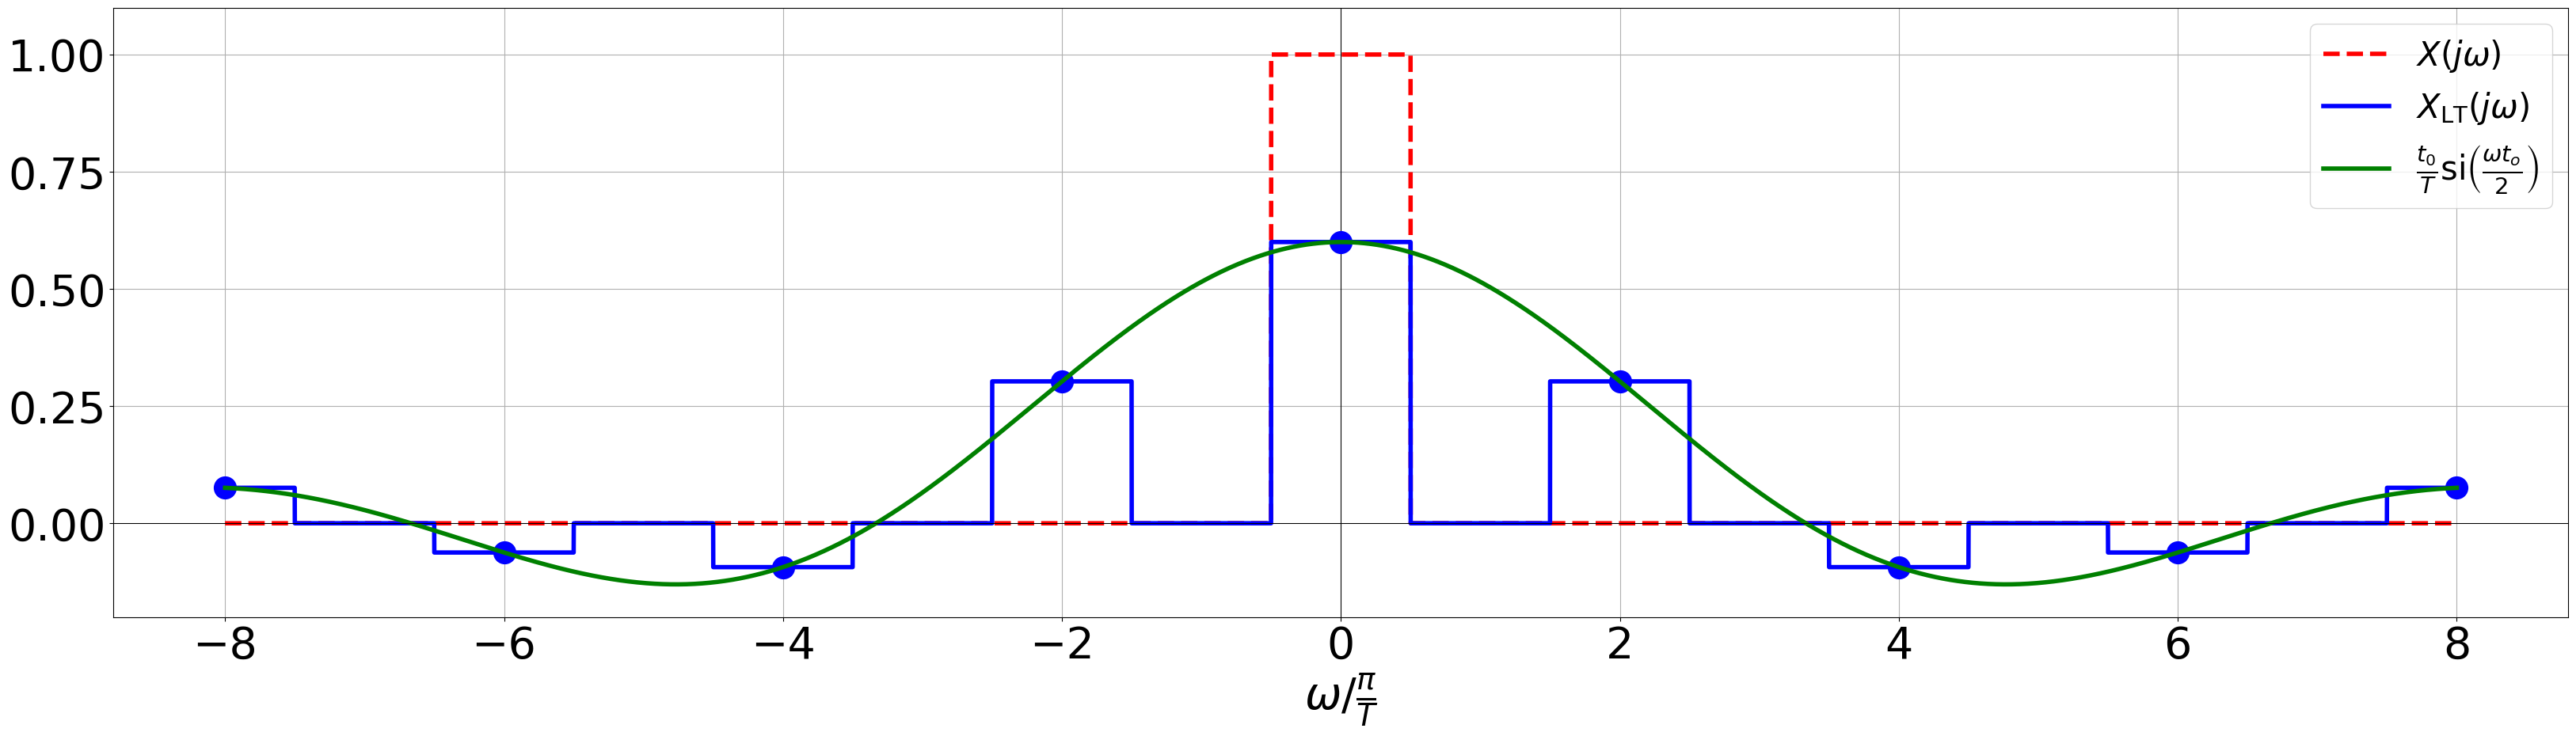

In [5]:
@interact(t_0=FloatSlider(min=0, max=1.0, step=0.1, value=0.6))
def plot_LT_spectrum(t_0):
    # Si-Funktion mit passenden Konstanten
    def si_t0(omega):
        return np.sinc(omega/(2*pi)*t_0)
    
    si_w = t_0*si_t0(omega)
    si_disc = np.zeros(omega.shape)
    si_disc[0::2*F_cont] = si_w[0::2*F_cont]*F_cont

    # Spektrum nach der linearen Torschaltung
    X_lt = np.convolve(X_w, si_disc, 'same')*delta_t

    # Plot von X_w, X_LT und der Si-Function als Hüllkurve
    plt.figure()
    plt.axvline(lw=0.75, c='k')
    plt.plot(omega*T/pi, X_w, 'r--', lw=4, label=r'$X(j\omega)$')
    plt.plot(n_w, t_0/T*si_t0(n_w*pi/T), 'bo', ms=20)
    plt.plot(omega*T/pi, X_lt, 'b', lw=4, label=r'$X_\mathrm{LT}(j\omega)$')
    plt.plot(omega*T/pi, si_w, 'g', lw=4,
             label=r'$\frac{t_0}{T}\mathrm{si}\left(\frac{\omega t_o}{2}\right)$')
    plt.axhline(lw=0.75, c='k')
    plt.ylim((-0.2, 1.1))
    plt.xlabel(r'$\omega/\frac{\pi}{T}$')
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=30)

### Rekonstruktion
Es entsteht statt des gewünschten periodischen Spektrums ein Spektrum, dessen Wiederholungen mit dem von $\omega$ unabhängigen Term $\frac{t_0}{T} \mathrm{si}\left( n\pi \frac{t_0}{T}\right)$ skaliert sind. Dies hat jedoch keine Auswirkungen auf die Rekonstruierbarkeit! Insbesondere ist der Term für $n=0$ gleich $\frac{t_0}{T}$ und deshalb relativ einfach rückgängig zu machen. Zusätzlich müssen wie bei idealer Rekonstruktion die Wiederholungen durch ein ideales Tiefpassfilter unterdrückt werden:  

\begin{align}
    X(j\omega) = X_\text{LT}(j\omega)\cdot H_\text{R}(j\omega) = X_\text{LT}(j\omega)\cdot \frac{T}{t_0} \mathrm{rect} \left( \frac{\omega}{2 \pi/T} \right)
\end{align}


### b) Abtast-Halte-Glied:
#### Zeitsignal:

\begin{align}
x_\text{SH}(t) &= \sum_{n=-\infty}^{\infty} \underbrace{x(nT)}_\text{nicht zeitabh.} \mathrm{rect}\left(\frac{t-nT}{t_0}\right)
    = \left[ \sum_{n=-\infty}^{\infty} x(nT) \delta\left( t-nT \right)\right]  \ast \mathrm{rect}\left( \frac{t}{t_0} \right)
\end{align}  

#### Spektrum:
Hier kann die Poisson'sche Sumenformel verwendet werden:

\begin{align}
    X_\text{SH}(j\omega) &= \mathcal{F}\left\{ x_\text{SH}(t) \right\} 
    = \mathcal{F}\left\{ \left[ \sum_{n=-\infty}^{\infty} x(nT) \delta\left( t-nT \right) \right] \ast \mathrm{rect}\left( \frac{t}{t_0} \right) \right\} \\    
    &= \mathcal{F}\left\{ \sum_{n=-\infty}^{\infty} x(nT) \delta\left( t-nT \right) \right\} \cdot \mathcal{F}\left\{ \mathrm{rect}\left( \frac{t}{t_0} \right) \right\} \\
    &= \left[ \frac{1}{T} \sum_{n=-\infty}^{\infty} X\left(\omega -n\frac{2 \pi}{T}\right)   \right] \cdot T \mathrm{si}\left( \frac{\omega T}{2} \right) \\
    &= \left[\sum_{n=-\infty}^{\infty} X\left(\omega -n\frac{2 \pi}{T}\right)   \right] \mathrm{si}\left( \frac{\omega T}{2} \right)
\end{align}

interactive(children=(FloatSlider(value=0.6, description='t_0', max=1.0), Output()), _dom_classes=('widget-int…

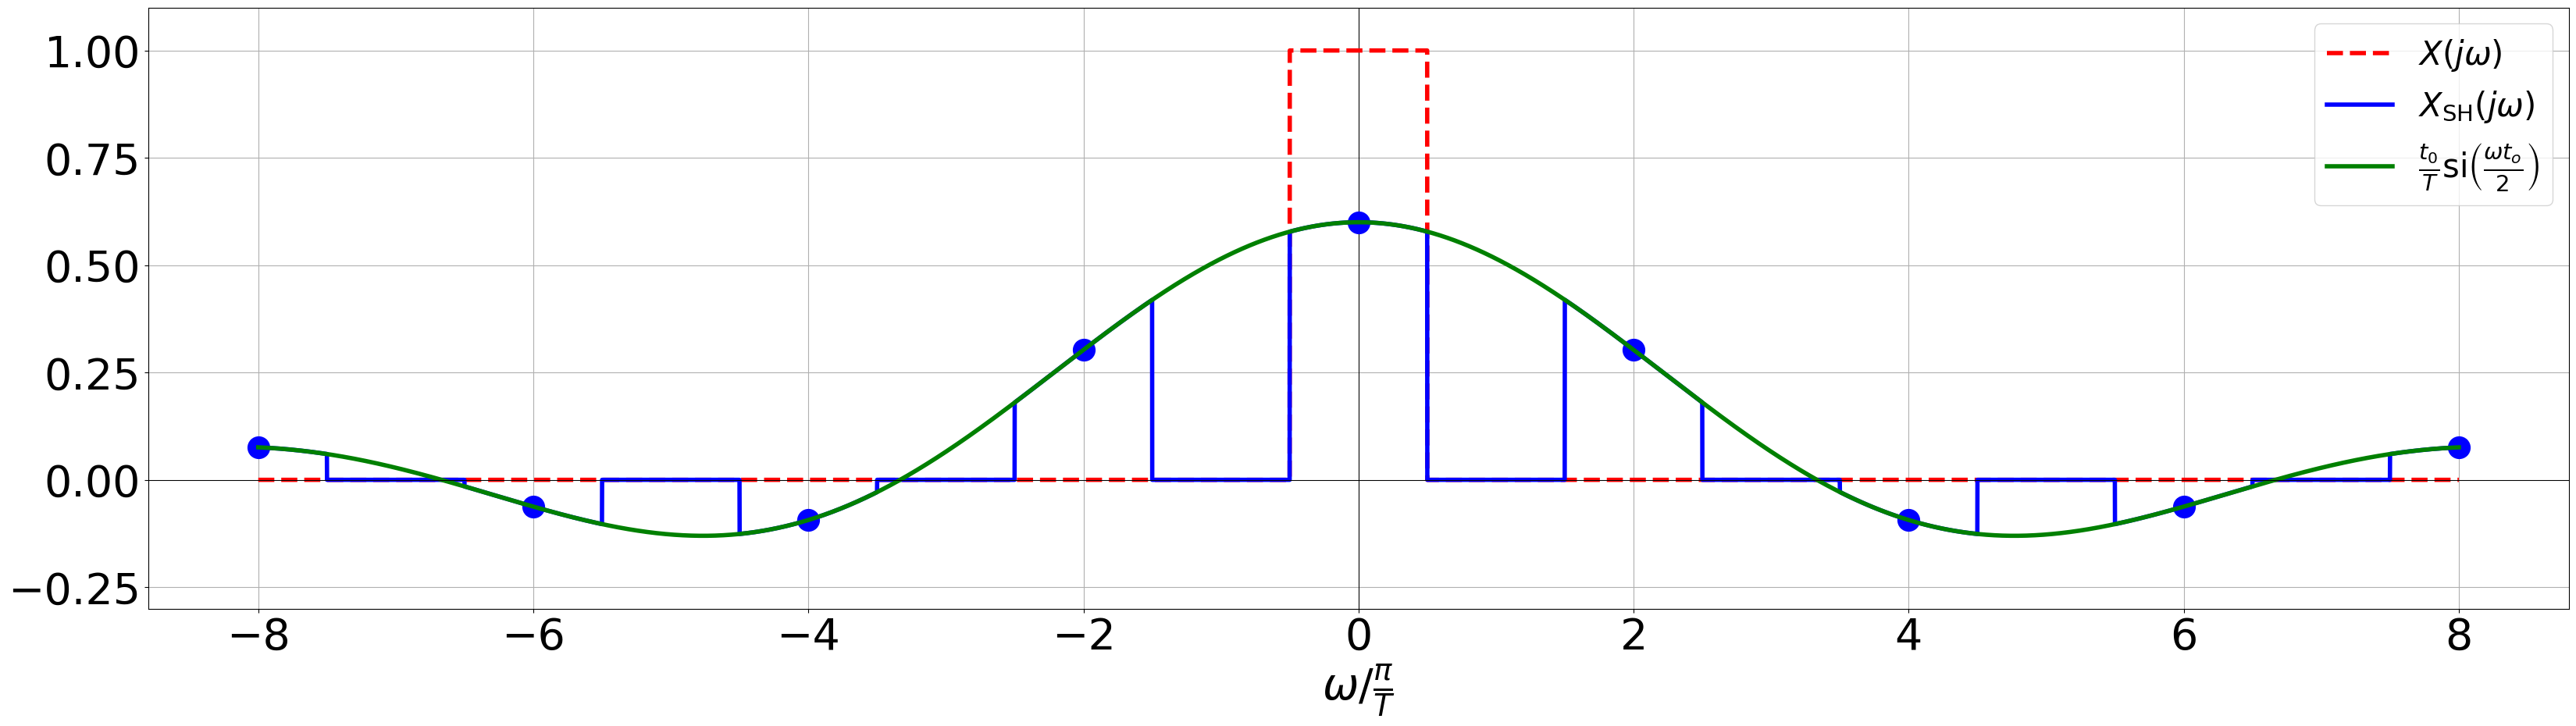

In [6]:
@interact(t_0=FloatSlider(min=0, max=1.0, step=0.1, value=0.6))
def plot_SH_spectrum(t_0):
    # Si-Funktion mit passenden Konstanten
    def si_t0(omega):
        return np.sinc(omega/(2*pi)*t_0)

    si_w = t_0/T*si_t0(omega)
    si_disc = np.zeros(omega.shape)
    delta = np.zeros(omega.shape)
    delta[0::2*F_cont] = 1*F_cont

    # Spektrum nach dem Sample-and-Hold-Glied
    X_sh = si_w*np.convolve(X_w, delta, 'same')/F_cont

    # Plot von X_w, X_SH und der Si-Function als Hüllkurve
    plt.figure()
    plt.axvline(lw=0.75, c='k')
    plt.plot(omega*T/pi, X_w, 'r--', lw=4, label=r'$X(j\omega)$')
    plt.plot(n_w, t_0/T*si_t0(n_w*pi/T), 'bo', ms=20)
    plt.plot(omega*T/pi, X_sh, 'b', lw=4, label=r'$X_\mathrm{SH}(j\omega)$')
    plt.plot(omega*T/pi, si_w, 'g', lw=4,
             label=r'$\frac{t_0}{T}\mathrm{si}\left(\frac{\omega t_o}{2}\right)$')
    plt.axhline(lw=0.75, c='k')
    plt.ylim((-0.3, 1.1))
    plt.xlabel(r'$\omega/\frac{\pi}{T}$')
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=30)

### Rekonstruktion
Es entsteht statt des gewünschten periodischen Spektrums ein Spektrum, das mit dem von $\omega$ **abhängigen** Term $\frac{t_0}{T} \mathrm{si}\left(\frac{\omega t_0}{2}\right)$ skaliert ist. Diese linearen Verzerrungen müssen durch ein inverses Filter ausgeglichen werden. Zusätzlich müssen wie bei idealer Rekonstruktion die Wiederholungen durch ein ideales Tiefpassfilter unterdrückt werden:

\begin{align}
    X(j\omega) = X_\text{LT}(j\omega)\cdot H_\text{R}(j\omega) = X_\text{LT}(j\omega)\cdot \frac{\frac{T}{t_0} \mathrm{rect} \left( \frac{\omega}{2 \pi/T} \right)}{\mathrm{si}\left(\frac{\omega t_0}{2}\right)}
\end{align}  
  
Das gesuchte Entzerrungsfilter kann (näherungsweise) als Kaskadierung einer Verzögerung im Vorwärtspfad, einer Rückkopplung mit Verzögerung im Rückwärtspfad und eines idealen Differenzierers aufgebaut werden:

\begin{align}
    \frac{\frac{T}{t_0}}{\mathrm{si}\left(\frac{\omega t_0}{2}\right)} 
    = \frac{\frac{T}{t_0} \left( 2 j \frac{\omega t_0}{2}\right)}{\mathrm{e}^{j\frac{\omega t_0}{2} } - \mathrm{e}^{-j\frac{\omega t_0}{2} }}
    = \frac{j \omega T}{\mathrm{e}^{j\frac{\omega t_0}{2} }\left(1  - \mathrm{e}^{-j\omega t_0 }\right)}
    = \frac{j \omega T}{\left(1  - \mathrm{e}^{-j\omega t_0 }\right)}\mathrm{e}^{-j\frac{\omega t_0}{2} }
\end{align}


### c) Linearer Interpolator:
#### Zeitsignal:
Wie aus dem Diagramm hervorgeht, lässt sich die lineare Funktion zwischen zwei Abtastwerten durch Addition verschobener Dreiecke darstellen, die jeweils mit dem Abtastwert gewichtet wurden. Deshalb gilt für das Zeitsignal:

\begin{align}
x_\text{LI}(t) &= \sum_{n=-\infty}^{\infty} x(nT)\  \Lambda\left(\frac{t-nT}{T}\right)
    = \left[ \sum_{n=-\infty}^{\infty} x(nT) \delta\left( t-nT \right)\right]  \ast \Lambda\left( \frac{t}{T} \right)
\end{align}  

Das Ergebnis ist dem der Abtast-Halte-Schaltung sehr ähnlich. Dies kann für die Spektralbereichsdarstellung ausgenutzt werden:
#### Spektrum:
Hier kann die Poisson'sche Sumenformel verwendet werden:  

\begin{align}
    X_\text{LI}(j\omega) &= \mathcal{F}\left\{ x_\text{LI}(t) \right\} 
    = \mathcal{F}\left\{ \left[ \sum_{n=-\infty}^{\infty} x(nT) \delta\left( t-nT \right) \right] \ast \Lambda\left( \frac{t}{T} \right) \right\} \\    
    &= \mathcal{F}\left\{ \sum_{n=-\infty}^{\infty} x(nT) \delta\left( t-nT \right) \right\} \cdot \mathcal{F}\left\{ \Lambda\left( \frac{t}{T} \right) \right\} \\
    &= \left[ \frac{1}{T} \sum_{n=-\infty}^{\infty} X\left(\omega -n\frac{2 \pi}{T}\right)   \right] \cdot T \mathrm{si}^2\left( \frac{\omega T}{2} \right) \\
    &= \left[\sum_{n=-\infty}^{\infty} X\left(\omega -n\frac{2 \pi}{T}\right)   \right] \mathrm{si}^2\left( \frac{\omega T}{2} \right)
\end{align}


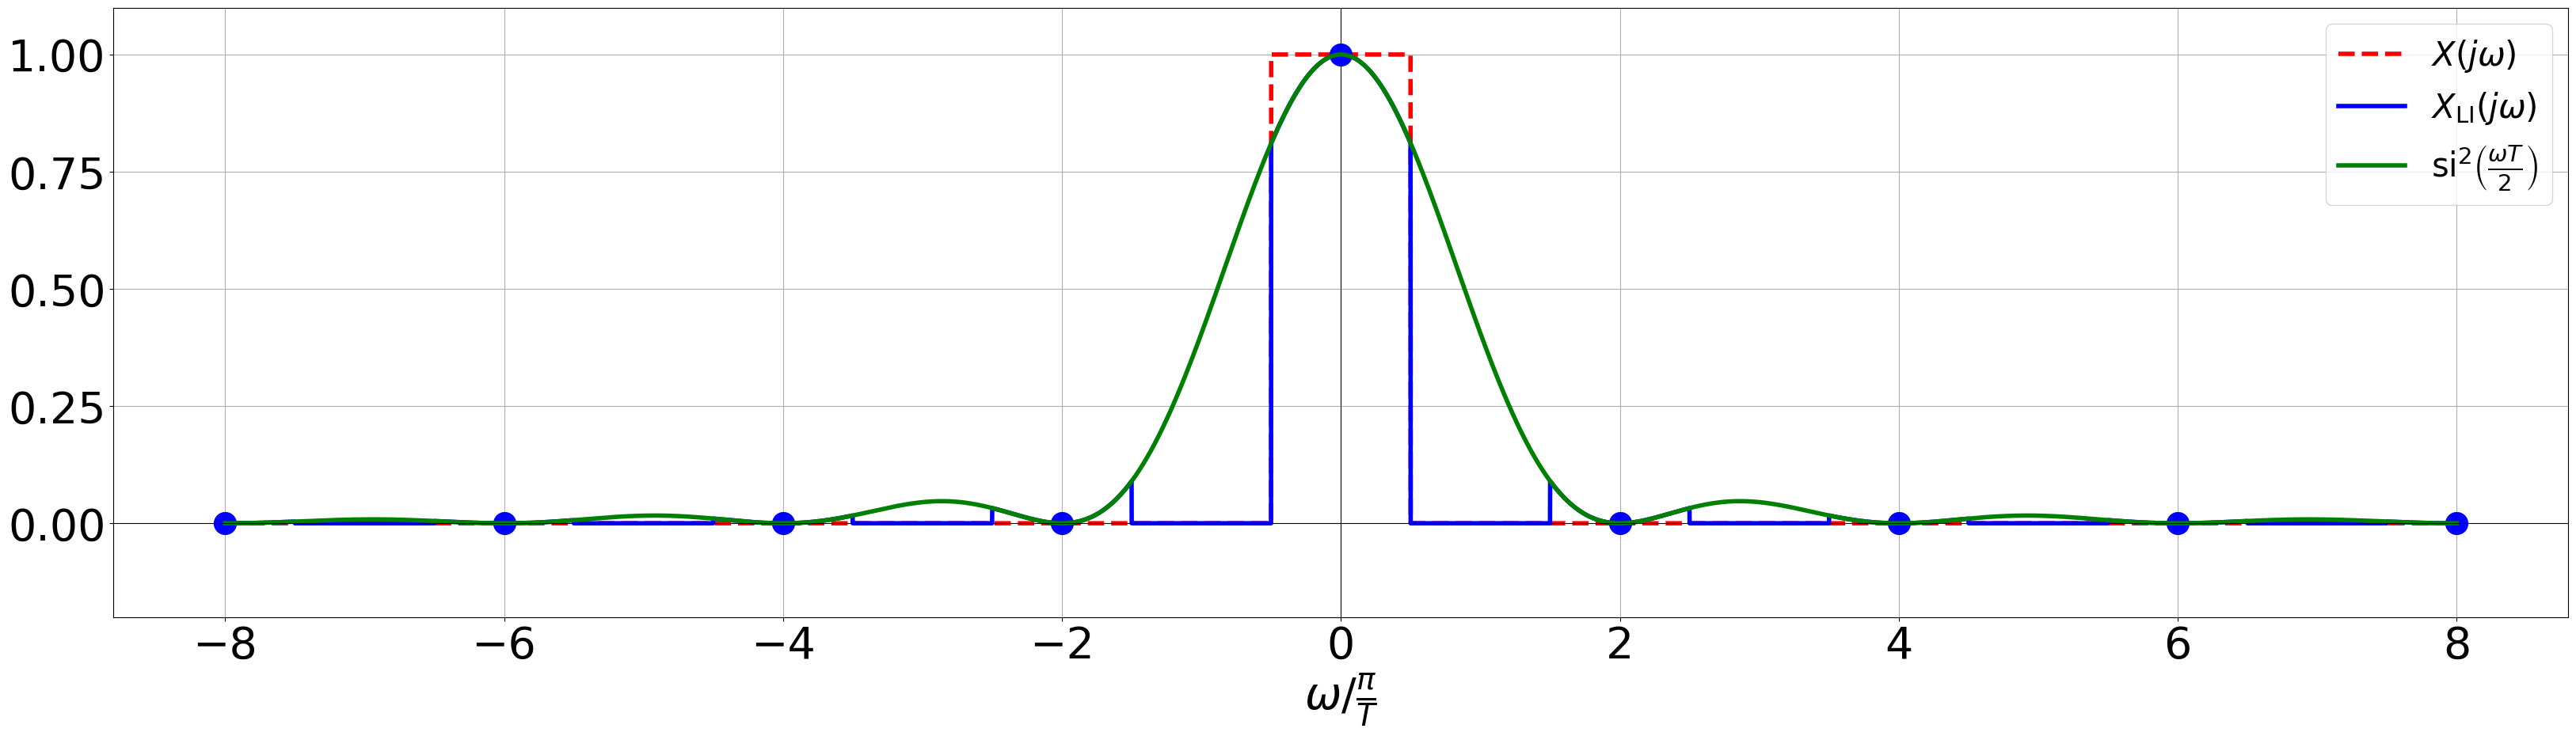

In [7]:
# Si-Funktion mit passenden Konstanten
def si_T(omega):
    return np.sinc(omega/(2*pi)*T)

si_w = si_T(omega)
si_disc = np.zeros(omega.shape)
delta = np.zeros(omega.shape)
delta[0::2*F_cont] = 1*F_cont

# Spektrum nach dem linearen Interpolator
X_li = (si_w**2)*np.convolve(X_w, delta, 'same')*delta_t

# Plot von X_w, X_LI und der Si-Function als Hüllkurve
plt.figure()
plt.axvline(lw=0.75, c='k')
plt.plot(omega*T/pi, X_w, 'r--', lw=4, label=r'$X(j\omega)$')
plt.plot(n_w, si_T(n_w*pi/T)**2, 'bo', ms=20)
plt.plot(omega*T/pi, X_li, 'b', lw=4, label=r'$X_\mathrm{LI}(j\omega)$')
plt.plot(omega*T/pi, si_w**2, 'g', lw=4,
         label=r'$\mathrm{si}^2\left(\frac{\omega T}{2}\right)$')
plt.axhline(lw=0.75, c='k')
plt.ylim((-0.2, 1.1))
plt.xlabel(r'$\omega/\frac{\pi}{T}$')
plt.grid(True)
drop = plt.legend(loc='upper right', fontsize=30)

### Rekonstruktion
Analog zum Abtast-Halte-Glied gilt:  
Es entsteht statt des gewünschten periodischen Spektrums ein Spektrum, das mit dem von $\omega$ **abhängigen** Term $\frac{t_0}{T} \mathrm{si}^2\left(\frac{\omega T}{2}\right)$ skaliert ist. Diese linearen Verzerrungen müssen durch ein inverses Filter ausgeglichen werden. Zusätzlich müssen wie bei idealer Rekonstruktion die Wiederholungen durch ein ideales Tiefpassfilter unterdrückt werden:

\begin{align}
    X(j\omega) = X_\text{LI}(j\omega)\cdot H_\text{R}(j\omega) = X_\text{LI}(j\omega) \cdot \frac{\mathrm{rect} \left( \frac{\omega}{2 \pi/T} \right)}{\mathrm{si}^2\left(\frac{\omega T}{2}\right)}
\end{align}  

Das Entzerrungsfilter kann durch zweimalige Hintereinanderschaltung und Skalierung des Entzerrers für das Abtast-Halte-Glied aufgebaut werden.

## Nachtrag: Das Spektrum des Dirac-Kamms

Das Transformationspaar aus der Vorlesung

\begin{align}
    \mathcal{F}\left\{ \sum_{n=-\infty}^{\infty} \delta(t-nT) \right\} \overset{!}{=} \frac{2 \pi}{T} \sum_{n=-\infty}^{\infty} \delta\left(\omega -n\frac{2 \pi}{T}\right)
\end{align}

lässt sich durch Verwendung von Methoden der Fouriertransformation und der Fourierreihenentwicklung gewinnen.

Zunächst wird die Fouriertransformierte zurück in den Zeitbereich gebracht:

\begin{align}
    \mathcal{F}^{-1}\left\{ \frac{2 \pi}{T} \sum_{n=-\infty}^{\infty} \delta\left(\omega -n\frac{2 \pi}{T}\right) \right\} 
    &= \frac{2 \pi}{T} \sum_{n=-\infty}^{\infty} \mathcal{F}^{-1}\left\{ \delta\left(\omega -n\frac{2 \pi}{T}\right) \right\} \\ 
    &=\frac{2 \pi}{T} \sum_{n=-\infty}^{\infty} \frac{1}{2 \pi}\int_{-\infty}^{\infty} \delta\left(\omega -n\frac{2 \pi}{T}\right) \mathrm{e}^{j \omega t} \mathrm{d}t \\
    &= \frac{1}{T} \sum_{n=-\infty}^{\infty} \mathrm{e}^{j n\frac{2 \pi}{T} t} \int_{-\infty}^{\infty} \delta\left(\omega -n\frac{2 \pi}{T}\right) \mathrm{d}t \\
    &= \frac{1}{T} \sum_{n=-\infty}^{\infty} \mathrm{e}^{j n\frac{2 \pi}{T} t}
\end{align}

Das Ergebnis ist eine Fourierreihe der Periodendauer $T$, bei der jeder Koeffizient gleich $\frac{1}{T}$ ist. 

Eine nähere Betrachtung des Dirackamms im Zeitbereich lässt ebenfalls ein periodisches Signal erkennen, wiederum mit der Periodendauer $T$. Deshalb wird auch für das Zeitsignal eine Fourierreihe angesetzt:

\begin{align}
    \sum_{n=-\infty}^{\infty} \delta(t-nT) = \sum_{k=-\infty}^{\infty} \Delta_k \mathrm{e}^{j k\frac{2 \pi}{T} t}
\end{align}

Die benötigten Koeffizienten $\Delta_k$ können durch Skalarproduktbildung der Zeitfunktion mit der zugehörigen konjugierten Exponentialschwingung der Frequenz $k\frac{2 \pi}{T}$ ermittelt werden, also der Mittelwertbildung über das Produkt der Zeitfunktionen:

\begin{align}
    \Delta_k &= \frac{1}{T}\int_{-T/2}^{T/2}\underbrace{\left[\sum_{n=-\infty}^{\infty} \delta(t-nT)\right]}_{\text{nur für $n=0$ innerhalb der Grenzen}} \mathrm{e}^{-j k\frac{2 \pi}{T} t} \mathrm{d}t \\
    &=  \frac{1}{T}\int_{-T/2}^{T/2} \delta(t)\mathrm{e}^{-j k\frac{2 \pi}{T} t}  \mathrm{d}t \\
    &= \frac{1}{T}\int_{-T/2}^{T/2} \delta(t)\mathrm{e}^{-j 0} \mathrm{d}t = \frac{1}{T}
\end{align}

Die gesuchten Fourierkoeffizienten sind also ebenfalls konstant gleich $\frac{1}{T}$.

Damit erhält man das gewünschte Ergebnis:

\begin{align}
    \sum_{n=-\infty}^{\infty} \delta(t-nT) = \frac{1}{T} \sum_{n=-\infty}^{\infty} \mathrm{e}^{j n\frac{2 \pi}{T} t} = \mathcal{F}^{-1}\left\{ \frac{2 \pi}{T} \sum_{n=-\infty}^{\infty} \delta\left(\omega -n\frac{2 \pi}{T}\right) \right\}
\end{align}